In [1]:
import datetime
import math
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import string

In [2]:
data = pd.read_csv("./data/norm_by_ref_datime.csv")

In [3]:
data.head()

,2014-12-31 04:00:00,2014-12-31 05:00:00,2014-12-31 09:00:00,2014-12-31 10:00:00,2014-12-31 11:00:00,2014-12-31 12:00:00,2014-12-31 13:00:00,2014-12-31 14:00:00,2014-12-31 16:00:00,2014-12-31 17:00:00,...,2014-12-31 07:00:00,2014-12-31 08:00:00,2014-12-31 15:00:00,2014-12-31 21:00:00,2015-01-01 05:00:00,2015-01-01 08:00:00,2015-02-01 03:00:00,2015-01-01 06:00:00,2015-01-01 07:00:00,Ref
0,0.222222,0.000000,0.000000,0.333333,0.888889,0.555556,0.111111,0.555556,0.555556,0.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11
1,0.000000,0.000000,0.076923,0.410256,0.282051,0.205128,0.128205,0.256410,0.230769,0.179487,...,0.000000,0.076923,0.076923,0.128205,0.000000,0.230769,0.076923,0.000000,0.000000,21
2,0.000000,0.000000,0.032258,0.096774,0.193548,0.161290,0.129032,0.161290,0.161290,0.129032,...,0.000000,0.000000,0.032258,0.000000,0.064516,0.032258,0.000000,0.129032,0.000000,31
3,0.039216,0.000000,0.196078,0.156863,0.529412,0.823529,0.490196,0.411765,0.392157,0.411765,...,0.058824,0.156863,0.705882,0.313725,0.000000,0.000000,0.019608,0.000000,0.000000,41
4,0.000000,0.064516,0.645161,0.494624,0.311828,0.763441,0.462366,0.494624,0.301075,0.462366,...,0.290323,0.559140,0.569892,0.150538,0.064516,0.118280,0.118280,0.096774,0.053763,51


In [12]:
reduced_data = PCA(n_components=2).fit_transform(data.loc[:, data.columns != "Ref"])

In [20]:
best = {"n_clusters": 0, "score": 0}

for n_clusters in range(2,20):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=1).fit(reduced_data)
    labels = kmeans.labels_
    score = metrics.silhouette_score(reduced_data, labels, metric='euclidean')
    print("n_clusters", n_clusters)
    print("score", score)
    print("----------")
    if score > best["score"]:
        best["n_clusters"] = n_clusters
        best["score"] = score

print(best["n_clusters"], best["score"])

n_clusters 2
score 0.4513256599787443
----------
n_clusters 3
score 0.35547598302733735
----------
n_clusters 4
score 0.3531043152702321
----------
n_clusters 5
score 0.37603655702296374
----------
n_clusters 6
score 0.40117403203193813
----------
n_clusters 7
score 0.4215278482452245
----------
n_clusters 8
score 0.3976524205557622
----------
n_clusters 9
score 0.3928355659853268
----------
n_clusters 10
score 0.4015377227656791
----------
n_clusters 11
score 0.40388076479097273
----------
n_clusters 12
score 0.4081098437706097
----------
n_clusters 13
score 0.39792053334441724
----------
n_clusters 14
score 0.40379055213582393
----------
n_clusters 15
score 0.40575571592516796
----------
n_clusters 16
score 0.4058092146425829
----------
n_clusters 17
score 0.3829155394728519
----------
n_clusters 18
score 0.3886380214620283
----------
n_clusters 19
score 0.3925100312844365
----------
2 0.4513256599787443


In [21]:
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10, random_state=1).fit(reduced_data)

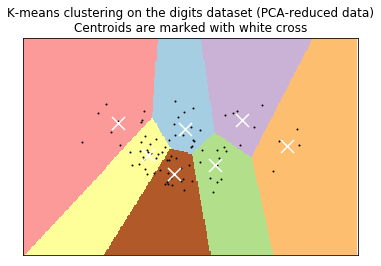

In [22]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [32]:
kmeans.labels_

array([6, 1, 1, 5, 5, 2, 0, 0, 4, 6, 1, 6, 5, 2, 5, 5, 6, 0, 1, 6, 5, 0,
       0, 5, 2, 6, 0, 1, 5, 2, 2, 2, 0, 5, 5, 0, 6, 6, 5, 2, 0, 1, 5, 0,
       0, 6, 6, 0, 5, 5, 5, 2, 6, 1, 6, 1, 5, 5, 5, 5, 0, 6, 3, 3, 1, 2,
       6, 0, 6, 4, 3, 4, 4, 5, 1, 1, 6, 6, 4, 3, 4], dtype=int32)

In [26]:
data.shape

(81, 49)

In [33]:
data["Cluster"] = kmeans.labels_

In [36]:
data[["Ref", "Cluster"]].to_csv("./data/ref_to_cluster.csv", index=False)